# Lin and Miranda 2008

Include description here.

##Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of capacity curves, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the folder containing this input using the parameter input_folder.

In [1]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

capacity_curves_file = '../../../../../../rmtk_data/capacity_curves_Sa-Sd.csv'
capacity_curves = utils.read_capacity_curves(capacity_curves_file)
#utils.plot_capacity_curves(capacity_curves)

## Load ground motion records

In [2]:
gmrs_folder = '../../../../../../rmtk_data/accelerograms'
gmrs = utils.read_gmrs(gmrs_folder)
minT = 0.1
maxT = 2
#utils.plot_response_spectra(gmrs,minT,maxT)

5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
100%


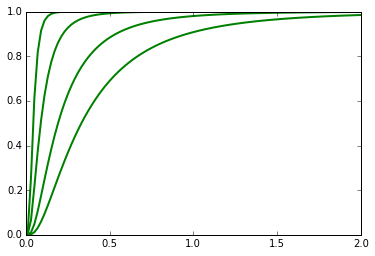

In [3]:
import lin_miranda_2008

damage_model = utils.read_damage_model('../../../../../../rmtk_data/damage_model.csv')
damping = 0.05
T = 2.0
PDM, Sds = lin_miranda_2008.calculate_fragility(capacity_curves,gmrs,damage_model)
fragility_model = utils.calculate_mean_fragility(gmrs,PDM,T,damping,'Sa',damage_model)
utils.plot_fragility_model(fragility_model,0.01,2)